docker run -p 8888:8888 -p 6006:6006 -v /c/Users/Elvis/Dropbox/CAS_Statistical_Modelling/Musik/:/notebooks/ -it oduerr/tf_docker:tf1_py3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
%matplotlib inline
from scipy import misc
import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"# use cpu


In [3]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

get_available_gpus()

['/cpu:0']

In [4]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [5]:
#loading the vgg16 net with all the weights
model = VGG16(weights='imagenet', include_top=True)

In [6]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
#get the weights of the fc1 layer
fc1=model.get_layer("fc1")
fc1_weights=fc1.get_weights()

In [8]:
#define a "new model" taht only goes until the flatten layer
from keras.models import Model
model_flaten_layer = Model(inputs=model.input, outputs=model.get_layer('flatten').output)

In [10]:
import glob
bilder=glob.glob("/notebooks/Song_Bilder/Radiohead/*.png")
bilder

['/notebooks/Song_Bilder/Radiohead/01 15 Step.png',
 '/notebooks/Song_Bilder/Radiohead/02 Bodysnatchers.png',
 '/notebooks/Song_Bilder/Radiohead/03 Nude.png',
 '/notebooks/Song_Bilder/Radiohead/04 Weird Fishes , Arpeggi.png',
 '/notebooks/Song_Bilder/Radiohead/05 All I Need.png',
 '/notebooks/Song_Bilder/Radiohead/06 Faust Arp.png',
 '/notebooks/Song_Bilder/Radiohead/07 Reckoner.png',
 '/notebooks/Song_Bilder/Radiohead/08 House Of Cards.png',
 '/notebooks/Song_Bilder/Radiohead/09 Jigsaw Falling Into Place.png',
 '/notebooks/Song_Bilder/Radiohead/10 Videotape.png']

In [11]:
X=np.zeros([len(bilder),224,224,3],dtype="uint8")
for i in range(0,len(bilder)):
    img=misc.imread(bilder[i])
    img=img[:,:,0:3]
    X[i]=img

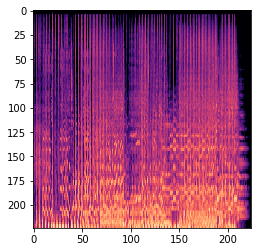

In [12]:
plt.imshow(X[0])

In [13]:
#get weights and bias of the fc1 weight list
W=(fc1_weights[0])
b=(fc1_weights[1])
print(W.shape)
print(b.shape)

(25088, 4096)
(4096,)


In [14]:
EMB_1=np.zeros((len(X),4096))
for i in range(0,len(X)):
    img_resized = np.expand_dims(X[i], axis=0)
    img_resized=np.asarray(img_resized,dtype="float64")
    img_resized = preprocess_input(img_resized)
    features=model_flaten_layer.predict(img_resized)
    EMB_1[i]=np.matmul(features,W)+b
    print(i)

0
1
2
3
4
5
6
7
8
9


In [15]:
import glob
bilder=glob.glob("/notebooks/Song_Bilder/Strokes/*.png")
bilder

['/notebooks/Song_Bilder/Strokes/01 -  Is This It.png',
 '/notebooks/Song_Bilder/Strokes/02 - The Modern Age.png',
 '/notebooks/Song_Bilder/Strokes/03 - Soma.png',
 '/notebooks/Song_Bilder/Strokes/04 - Barely Legal.png',
 '/notebooks/Song_Bilder/Strokes/05 - Someday.png',
 '/notebooks/Song_Bilder/Strokes/06 - Alone, Together.png',
 '/notebooks/Song_Bilder/Strokes/07 - Last Nite.png',
 '/notebooks/Song_Bilder/Strokes/08 - Hard to Explain.png',
 '/notebooks/Song_Bilder/Strokes/09 - When It Started.png',
 '/notebooks/Song_Bilder/Strokes/10 - Trying to Your Luck.png',
 '/notebooks/Song_Bilder/Strokes/11 - Take It Or Leave It.png']

In [16]:
X=np.zeros([len(bilder),224,224,3],dtype="uint8")
for i in range(0,len(bilder)):
    img=misc.imread(bilder[i])
    img=img[:,:,0:3]
    X[i]=img

In [17]:
EMB_2=np.zeros((len(X),4096))
for i in range(0,len(X)):
    img_resized = np.expand_dims(X[i], axis=0)
    img_resized=np.asarray(img_resized,dtype="float64")
    img_resized = preprocess_input(img_resized)
    features=model_flaten_layer.predict(img_resized)
    EMB_2[i]=np.matmul(features,W)+b
    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [18]:
EMB=np.vstack([EMB_1,EMB_2])
EMB.shape

(21, 4096)

In [19]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(EMB)

In [20]:
y=np.append(np.repeat(0,10),np.repeat(1,11))

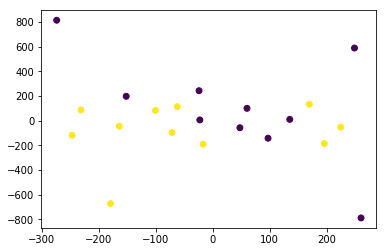

In [21]:
#plt.figure(figsize=(8,8))
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y,s=35)

In [25]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(EMB)
EMB = pca.transform(EMB)

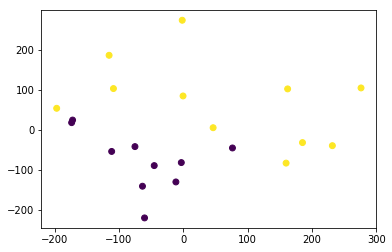

In [27]:
plt.scatter(x=EMB[:,0],y=EMB[:,1],c=y,s=35)